# PROBLEM STATEMENT:
Implement a KNN model to classify the animals in to categorie

In [104]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
#load data set
df=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 13-KNN/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [107]:
# getting the no of type of animals in zoo
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [108]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [109]:
df[df.duplicated()].sum()

animal name    0.0
hair           0.0
feathers       0.0
eggs           0.0
milk           0.0
airborne       0.0
aquatic        0.0
predator       0.0
toothed        0.0
backbone       0.0
breathes       0.0
venomous       0.0
fins           0.0
legs           0.0
tail           0.0
domestic       0.0
catsize        0.0
type           0.0
dtype: float64

In [110]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:xlabel='type', ylabel='count'>

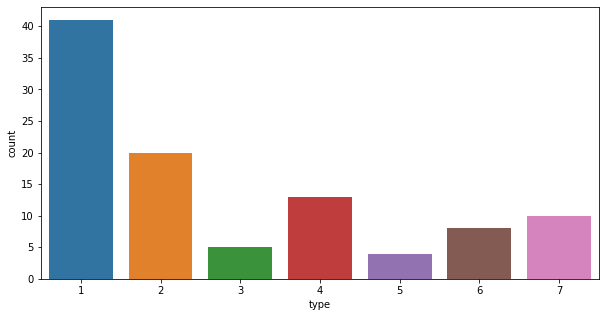

In [111]:
#ploting the count plot for the type
plt.rcParams['figure.figsize']=[10,5]
sns.countplot(x='type',data=df)

### Observation:
1. type-1  animal are more followed by type-2 ,type-4,type-7 then type-6

<AxesSubplot:xlabel='legs', ylabel='count'>

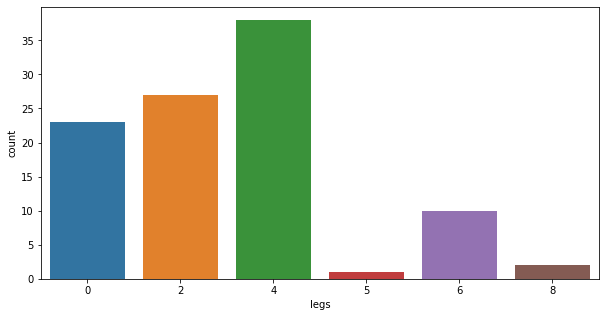

In [112]:
sns.countplot(x='legs',data=df)

1. animal with foue legs are more foolowed by 2 legs

# KNN

### Finding the optimal values of K

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [114]:
# spliting the values in to dependent and independent valriable.
X=df.iloc[:,1:17]
y=df.iloc[:,17]


In [115]:
X.shape

(101, 16)

In [116]:
# splitting the data into train test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [117]:
k_values=np.arange(1,25)


In [122]:
train_accuracy=[]
test_accuracy=[]

In [127]:
from sklearn.neighbors import KNeighborsClassifier
for i,k in enumerate(k_values):
     knn=KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train,y_train)
     train_accuracy.append(knn.score(X_train,y_train))
     test_accuracy.append(knn.score(X_test,y_test))
   

In [128]:
k_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

([<matplotlib.axis.XTick at 0x26969780520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

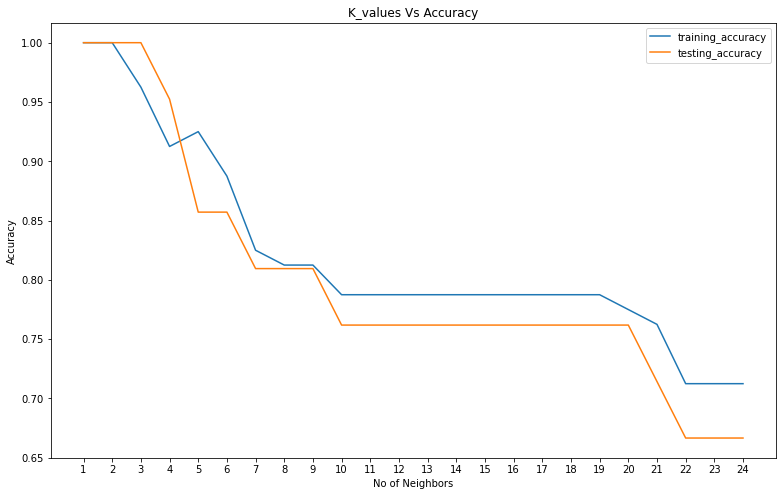

In [129]:
plt.figure(figsize=[13,8])
plt.plot(k_values,train_accuracy,label='training_accuracy')
plt.plot(k_values,test_accuracy,label='testing_accuracy')
plt.legend()
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.title('K_values Vs Accuracy')
plt.xticks(k_values)

# k = 5 produces more accuracte result lets take K=5¶

In [130]:
knn=KNeighborsClassifier(n_neighbors=5)

In [131]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
from sklearn.model_selection import cross_val_score
knn_score=cross_val_score(knn,X,y,cv=10)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [133]:
knn_score

array([0.90909091, 0.9       , 0.8       , 0.9       , 1.        ,
       0.9       , 0.9       , 0.8       , 0.8       , 0.9       ])

In [134]:
knn_score.mean()

0.8809090909090909

In [135]:
pred_Train=knn.predict(X_train)

In [136]:
pred_Train

array([6, 1, 4, 5, 7, 6, 4, 1, 1, 1, 1, 2, 6, 1, 4, 1, 2, 4, 6, 2, 1, 2,
       2, 7, 1, 1, 5, 1, 1, 1, 2, 7, 1, 2, 2, 4, 2, 4, 6, 2, 4, 3, 2, 7,
       1, 1, 4, 6, 1, 4, 1, 4, 1, 7, 1, 1, 7, 1, 2, 4, 1, 2, 6, 2, 2, 1,
       1, 2, 1, 1, 1, 6, 4, 1, 1, 1, 5, 4, 1, 1], dtype=int64)

In [137]:
# finding accuracy score for train data
from sklearn.metrics import accuracy_score
accuracy_score(y_train,pred_Train)

0.925

In [138]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_Train)

array([[32,  0,  0,  1,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  2,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  0,  2,  6]], dtype=int64)

In [139]:
pred_test=knn.predict(X_test)
pred_test

array([5, 4, 1, 1, 6, 4, 1, 6, 4, 2, 1, 1, 1, 2, 6, 2, 4, 7, 1, 2, 4],
      dtype=int64)

In [140]:
# finding accuracy score for test data

accuracy_score(y_test,pred_test)

0.8571428571428571

# KNN model accuracy score for training is 92.5% and over test data it is 85.7%